# **Projet NLP: Classification IA and Human Texts**

<ins>Group :</ins>
- Thomas Sinapi
- Pierre Derathe
- Manitas Bahri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from pprint import pprint

In [2]:
df = pd.read_csv("data.csv")
X, y = df["text"], df["generated"].astype("int")

In [11]:
df.shape

(487235, 2)

## **1. <ins>Data Analysing</ins>**

In [3]:
print("Human Text")
pprint(X[y == 0].iloc[0])

Human Text
('Cars. Cars have been around since they became famous in the 1900s, when '
 'Henry Ford created and built the first ModelT. Cars have played a major role '
 'in our every day lives since then. But now, people are starting to question '
 'if limiting car usage would be a good thing. To me, limiting the use of cars '
 'might be a good thing to do.\n'
 '\n'
 'In like matter of this, article, "In German Suburb, Life Goes On Without '
 'Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of '
 'suburbs, where middle class families from either Shanghai or Chicago tend to '
 'make their homes. Experts say how this is a huge impediment to current '
 'efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are '
 'responsible for 12 percent of greenhouse gas emissions in Europe...and up to '
 '50 percent in some carintensive areas in the United States. Cars are the '
 'main reason for the greenhouse gas emissions because of a lot of people '
 'dri

In [4]:
print("AI Text")
pprint(X[y == 1].iloc[0])

AI Text
('This essay will analyze, discuss and prove one reason in favor of keeping '
 'the Electoral College in the United States for its presidential elections. '
 'One of the reasons to keep the electoral college is that it is better for '
 'smaller, more rural states to have more influence as opposed to larger '
 'metropolitan areas that have large populations. The electors from these '
 'states are granted two votes each. Those from larger, more populated areas '
 'are granted just one vote each. Smaller states tend to hold significant '
 'power because their two votes for president and vice president add up more '
 'than the votes of larger states that have many electors. This is because of '
 'the split of the electoral votes. Some argue that electors are not bound to '
 'vote for the candidate who won the most votes nationally. They do not have '
 "to vote for their own state's nominee unless their state has a winner take "
 'all system. However, there are states that have adop

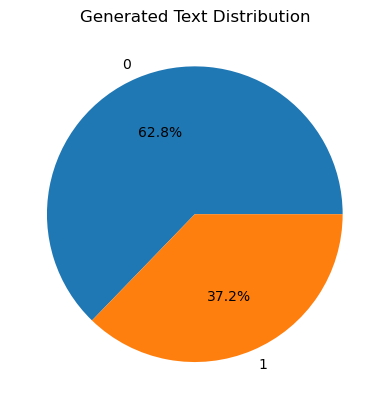

In [5]:
# Plot the distribution of the generated text
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%')
plt.title("Generated Text Distribution")
plt.show()

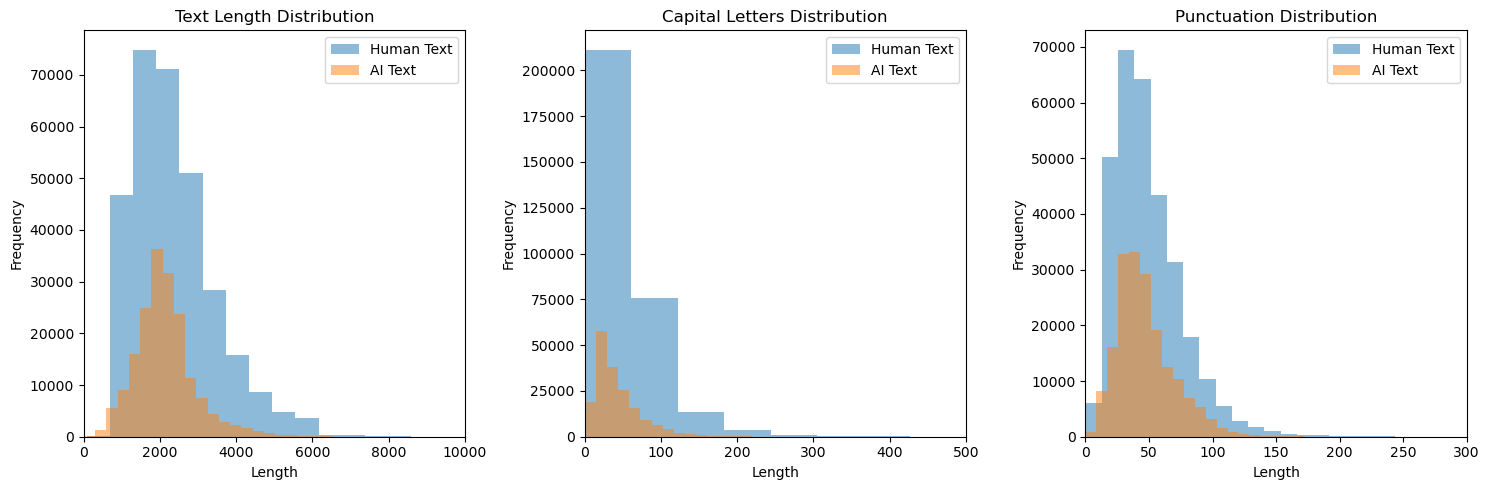

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the distribution of the text length by class
ax[0].hist(X[y == 0].str.len(), bins=30, alpha=0.5, label="Human Text")
ax[0].hist(X[y == 1].str.len(), bins=30, alpha=0.5, label="AI Text")
ax[0].set_title("Text Length Distribution")
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Frequency")
ax[0].legend()
ax[0].set_xlim(0, 10000)

# Plot the distribution of the capital letters by class
count_upper_g = X.str.findall(r"[A-Z]").str.len().groupby(y)
ax[1].hist(count_upper_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[1].hist(count_upper_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[1].set_title("Capital Letters Distribution")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Frequency")
ax[1].legend()
ax[1].set_xlim(0, 500)

# Plot the distribution of the punctuation by class
count_punct_g = X.str.findall(r"[^\w\s]").str.len().groupby(y)
ax[2].hist(count_punct_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[2].hist(count_punct_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[2].set_title("Punctuation Distribution")
ax[2].set_xlabel("Length")
ax[2].set_ylabel("Frequency")
ax[2].legend()
ax[2].set_xlim(0, 300)

plt.tight_layout()
plt.show()

In [7]:
X_lower = X.str.lower()

In [8]:
X_clean =  X_lower.map(lambda x : re.sub(r"\W", " ", x))

In [17]:
# tokenize the text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_cv = cv.fit_transform(X_clean)



In [20]:
print("Vocabulary Size:", len(cv.vocabulary_))
print("Most Common Words:", list(cv.vocabulary_.keys())[:10])
print("Least Common Words:", list(cv.vocabulary_.keys())[-10:])

Vocabulary Size: 259050
Most Common Words: ['cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the']
Least Common Words: ['bbygiving', 'wyoumore', 'wfourside', 'overflew', 'thivkthat', 'wbenever', 'environkentallyfriendly', 'widvopvn', 'therev', 'cabnevcolate']


In [9]:
# skip gram 
from nltk.tokenize import word_tokenize
from nltk.util import skipgrams

In [10]:
x_tokens = X_clean.map(word_tokenize)


In [12]:
x_tokens

0         [cars, cars, have, been, around, since, they, ...
1         [transportation, is, a, large, necessity, in, ...
2         [america, s, love, affair, with, it, s, vehicl...
3         [how, often, do, you, ride, in, a, car, do, yo...
4         [cars, are, a, wonderful, thing, they, are, pe...
                                ...                        
487230    [tie, face, on, mars, is, really, just, a, big...
487231    [the, whole, purpose, of, democracy, is, to, c...
487232    [i, firmly, believe, that, governments, worldw...
487233    [i, dfn, t, agree, with, this, decision, becau...
487234    [richard, non, jimmy, carter, and, bob, dole, ...
Name: text, Length: 487235, dtype: object

In [13]:
# avg number of tokens
avg_tokens = x_tokens.map(len).mean()

In [14]:
avg_tokens

398.48697035311505

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

svc = SVC()
svc.fit(X_train_tfidf, y_train)

y_pred = svc.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9985530596118916
Confusion Matrix:
 [[61094    18]
 [  123 36212]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     61112
           1       1.00      1.00      1.00     36335

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447

